
# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

**Sometimes people have health complications and make medical appointments for diagnosis and possible treatment, they are given all the necessry instructions and are given a date to come for the appointment but at the end of the day, they do not show up, Why so?**

**This dataset collects information from over 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.**

**We intend to explore this dataset and try to come up with an assumption as to why some patients make Medical appointments and not show up for the appointments**

**The Dataset contains 110,527 entries (rows) and 14 variables(columns) Below are the variables and  what they represent**

| Variable	| Description |
|:---: | :---:| 
|PatientID | Combinations of numbers to identify a Patient |
|AppointmentID |  Combinations of numbers to identify a Patient's apointment|
|Gender | The Patient's gender (M - Male , F - Female)|
|ScheduledDay | The day the Patient Scheduled his Appointment|
|AppointmentDay | The Actual Day of Patient's appointment|
|Age | Patient's Age |
|Neighbourhood| The Neighbourhood where the Appointments takes place|
|Scholarship | Whether or not a patient is enrolled in the Brazilian Welfare Program `Bolsa Familia` [1 - True , 0 - False] |
|Hipertension | Whether or not the patient is hipertensive [1 - True , 0 - False] |
|Diabetes | Whether or not the patient is diabetic [1 - True , 0 - False] |
|Alcoholism |Whether or not the patient is an alcoholic  [1 - True , 0 - False] |
|Handcap| Whether or not the patient is Handicapped [1 - True , 0 - False] |
|SMS_received| Whether or not the patient received a SMS reminding him/her of his appointment  [1 - True , 0 - False] |
|No-show| Whether or not the patient showed up eventually for the appointment [No - 'showed up',  Yes - 'Did not show up'] |


### Questions for Analysis

    1. Does the number of days of waiting affect showing up ?
	2. Does Patients age affect showing up?
	3. Does being handicapped affect  showing up or not ?
	4. Does being Diabetic affect  showing up or not ? 
	5. Does being Alcoholic affect  showing up or not ?
	6. Does being Hipertensive affect  showing  up or not ?
	7. Does enrollment in scholarship affect showing up for appointment?
	8. Which category of people showed up the most among those who received SMS and those who did not?
	9. What is the average waiting days for those who received sms and those who did not 
	10.What are the top 5 neighbourhood in which the most appointment show up was recorded ?
	11.Are the Health scholarship distributed evenly between Males and Females ?

In [540]:
#import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>

## Data Wrangling

**In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.**

### Gathering Data

In [422]:
#loading the data into the notebook
df = pd.read_csv('no_show_appointments.csv')

In [423]:
#checking through the first five rows just to have a look at our data and begin to take notes of cleanings to be done
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 ### Accessing Data

 **In this section, we will check through our data for errors, duplicates, unique values and many other important details in the Dataset**

In [424]:
#to check info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**We can see from this output that all our headers are written in sentence case. It is best to have them all in small letters and in case of those that are seperated with space we replace with `_` although, there is no such header like that in this dataset, hence we wil stick to renaming all in small letter. We will address this during the cleaning phase. In addition to these, we  will  rename the `Handcap` column because it is spelt wrongly and finally rename the `No-Show` column name and replace `-` with `_`.**

***Next, Let's have a look at our data types***

In [425]:
#check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**The Patient and appointment ID Columns will not be needed in this study so we won't bother ourselves on their data types. Looking closely, all columns are formatted in the right type except for the `ScheduledDay` and the `AppointmentDay`.**

**They are both supposed to be `datetime` so we will take note of that and address it as we go on with the project.**


***Next, let's check for missing rows***

In [426]:
#check for null values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**As we can see from above, there are no missing values at all in this dataset.**


***Next, Let's check for duplicate values***

In [427]:
#check for duplicate rows
df.duplicated().sum()

0

**As we can see from above, there are no duplicate  rows at all in this dataset.**

***Next, Let's check for unique values***

In [429]:
#check for the unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**As we can see from the table above, there are fewer `PatientID` than `appointmentID`, which means that some patients (roughly `50,000`) made appointments more than once, and since there are no duplicate values, those `50,000` were either patients who missed their initial appointment and had to make another, or patients who made additional appointments for reasons other than their initial appointments.**

**We can see that appointments were made in hospitals located in `81` unique neigborhoods**


***Lastly, we see an error in the number of unique values we have for the `handicap` column.***


**A patient is either handicapped or not, hence the values for that column should be `0` (for those who are not) and `1` (for those who are) However, we can see `5` values here. Let's take a closer look at these other values.**

In [430]:
#to check for the unique values in the Hanicap column
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

**We can see that we have `2`, `3`, `4` in that column which is not meant to be so. We will take note of this so that when we are cleaning, we will address this too.**

**Finaly, let's check the shape of the dataset before we proceed to cleaning the data**

In [431]:
#to see the shape of the dataset
df.shape

(110527, 14)

**We are able to see that this data contains 110,527 entries (rows) and 14 Variables (columns). At intervals, we will be checking the shape of this data frame so that we know how the analysis is progressing.**


### Data Cleaning


**In this phase, we shall be performing Data Cleaning. We shall be deleting some unnecesary columns, doing some renaming, fxing the issue of the unique values found in the `Handcap` column, change the data types that needs to be fixed, and other errors we have noticed or might come accross.**

**let's begin with dropping columns we do not need (`AppointmentID` and `PatientID`)**
 

In [432]:
#to drop the AppointmentID and PatientID columns
df.drop(columns=['AppointmentID', 'PatientId'],axis=1, inplace=True)

In [433]:
#confirm the drop
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [434]:
#check shape again
df.shape

(110527, 12)

**First step complete, we have succesfully deleted the `AppointmentID` and `PatientID` columns because we dont need them.**

**Next, we move on to rename `Handcap` column to `Handicap`**

In [435]:
#rename column name fron Handcap to Handicap
df = df.rename(columns = {'Handcap' : 'Handicap'})

In [436]:
#confirm the renaming
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


**As we can see, the column has been renamed. Now let's go on to rename the `No-show` column and replace the `-` with `_`**

In [437]:
#replace '-' with '_' in the 'No-show' column name
df = df.rename(columns = {'No-show' : 'No_show'})

In [438]:
#confirm the renaming
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


**Now, we are good to go. Next we will perform the final renaming operation which will be to change all column names to lower case and not leave them in the sentence case as they are in right now. This will ease our typing and analysis along the way**

In [439]:
#convert all column name to lowercase
df = df.rename(columns = lambda x: x.strip().lower())

In [440]:
#confirm the renaming
df.head(0)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show


**We have succesfully changed all column names to lowercase**

**Next, we will move on to fix the unique values issues of the `handicap` column. What we will do is to change all entries with value `2, 3, 4` to `1`. By doing this, the only values we will have in the column will be `0` and `1`.**

In [441]:
#check value counts first
df.handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [442]:
#then fix the column by making every value >=1 to 1 using pandas apply
df.handicap = df.handicap.apply(lambda val: 1 if val >=1 else 0 )

In [443]:
#confirm
df.handicap.unique()

array([0, 1], dtype=int64)

**Now we  have made the unique values in the handicap column equal to `1` and `0`**

**Lastly, for this phase, we will be converting the `scheduleday` and `appointmentday` column to datetime data type so that we will be able to perform some date operations on it as we proceed in the data exploratory and conclusion phase**

In [444]:
#put both columns in a list and perform the conversion using the 'to_datetime'
dates = ['scheduledday','appointmentday']
for c in dates:
    df[c] = pd.to_datetime(df[c])

In [445]:
#confirm that the data types has been changed
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
no_show                        object
dtype: object

**We see from above that the data types of both columns have been changed to `datetime64` and when the time comes during our exploratory analysis, we will explore those columns and perform some date operations on them.**

<a id='eda'></a>
## Exploratory Data Analysis

**In this phase we will begin by exploring each column individually and creating plots to understand their distribution and any other relevant information that can be gotten from them.**


### Exploring the `scheduleday` and `appointmentday` Columns

**We will start by performing some operations on the `appointmentday` and `scheduleday` columns. a very important metric that definitely will be very useful in our analysis is the number of days that a patient waits before his day of appointment finally comes(i.e, the number of days between when a patient schedules his/her appointment and the actual day of the appointment). We can get this by subtracting the `apointmentday` from the `scheduleday`. We will create this column and check for the average waiting days, the least day a patient had to wait and the highest day a patient had to wait.**

In [446]:
#to create a new column called 'waiting_days' by subtracting the 'scheduleday' form the 'appointmentday' and get us the days excluding the hours because we do not need it
waiting_days = df.appointmentday.dt.date - df.scheduledday.dt.date

In [447]:
#investigate the new column 'waiting_days'
waiting_days

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Length: 110527, dtype: timedelta64[ns]

**We see here that the column is formated in days with 'days' at the end of the value. For us to be able to perform statistical operations, we need to remove the '`..days'` we have in the array. let's extract it below**

In [448]:
#get the values of the days only without the string value 'days'
waiting_days = waiting_days.dt.days

In [449]:
#confirm that we have removed the 'days' value
waiting_days

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Length: 110527, dtype: int64

In [450]:
#insert the new column into the dataframe as the fifth column because we want the column to be just after the 'appointmentday' column
df.insert(3, 'waiting_days', waiting_days)

In [468]:
#confirm this
df.head(2)

,gender,scheduledday,appointmentday,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,56-75,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,56-75,JARDIM DA PENHA,0,0,0,0,0,0,No


**We had two cases of waiting days beign negative values, (i.e the appointment day was set before the scheduled day) which just makes no sense so we will replace those values with 0 making the appointment day same with the scheduled day**

In [452]:
df['waiting_days'] = df['waiting_days'].replace([-1],0)
df['waiting_days'] = df['waiting_days'].replace([-6],0)

In [469]:
#check out some important information about the new column
df.waiting_days.describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

**Based on the data above, we can deduce that the shortest time a patient had to wait for an appointment was `0 days` (i.e the appoinment was set for the same day in which it was scheduled). There's a good chance that such patient(s) didn't forget about their appointment.**

**We also learned that the average number of days a patient waits for an appointment is `10 Days`**.

**Finally, the longest time a patient had to wait for an appointment was `179` days. This is around `6 months` from the scheduled date, and there is a considerable likelihood that they will not show up for the appointment owing to the extended waiting period**.

### Exploring the `ages` Column


**Now let's look at the 'ages' column. First, we'll use a box plot and a histogram to verify the distribution of the ages, then we'll group the ages and construct a new column using that grouping. It will offer us a clearer picture of what's going on with our patients' ages in relation to the appointmets made.**

**Let's make a box plot to determine whether the ages have any outliers**

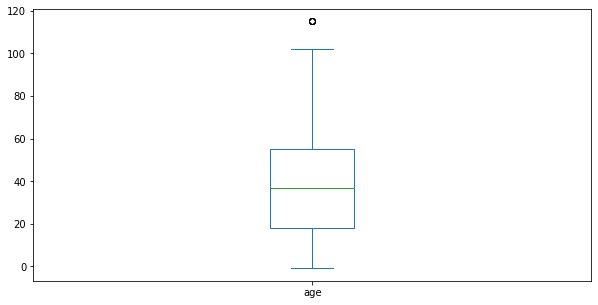

In [470]:
#create a boxplot for ages
df.age.plot(kind = 'box', figsize =(10,5));

***We see an outlier age from the plot above, very close to 120 but since it just one it does not significantly affect our data or analysis, so we will ignore it and continue with our other analysis***


**Let's Use a Histogram to check the distribution of the ages of the patients**

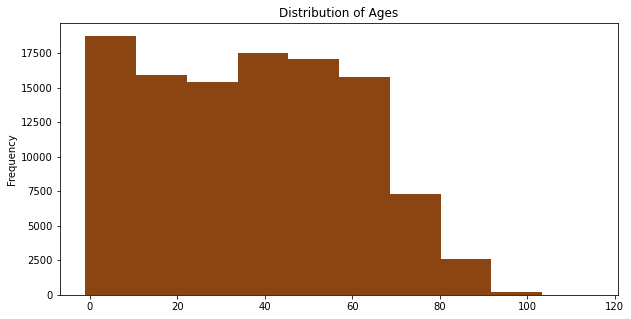

In [573]:
#create a histogram to check the distribution of the ages distribution
df.age.plot(kind = 'hist', title = 'Distribution of Ages', figsize=(10,5), color = "#8B4513");

**This chart indicates that as the age of the patient increases, the frequency of patient appointments decreases. This indicates that more appointments were made by younger people.'**


**Let's group the ages column by various age groups to get a more comprehensive perspective of the distribution of our ages, and then make a line plot to observe the trend of these ages.**

***We'll divide the data into compartments (age groups) using the pandas cut function and then investigate***

In [456]:
#creating a list of how ages are to be grouped and attaching a name to each category
bin_labels = ['0-5', '6-10', '11-17', '18-35', '36-55', '56-75', '76+']
bin_edges =[0, 5, 10, 17, 35, 55, 75, 115]

In [457]:
#create the 'age_group' column and insert it as the fifth column just after the 'age' column
age_group = pd.cut(df['age'], bin_edges, labels = bin_labels)
df.insert(5, 'age_group', age_group)

In [472]:
#confirm by checking the table 
df.head(3)

,gender,scheduledday,appointmentday,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,56-75,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,56-75,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,56-75,MATA DA PRAIA,0,0,0,0,0,0,No


In [473]:
#now let's see how the ages are distributed first without a plot
df.groupby('age_group').age.count()

age_group
0-5       8192
6-10      7018
11-17     8630
18-35    25624
36-55    30019
56-75    22112
76+       5392
Name: age, dtype: int64

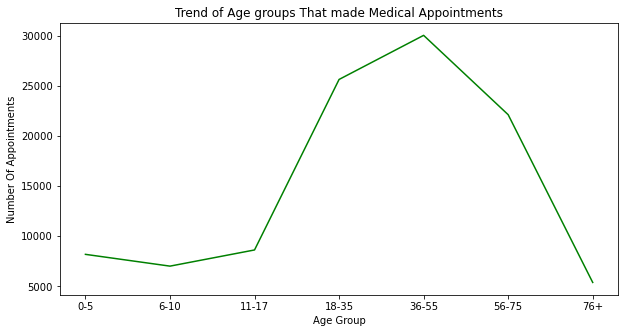

In [571]:
# now let's create a line plot to show this distribution
age_group = df.groupby('age_group').age.count()

plt.subplots(figsize = (10,5))
plt.plot(age_group, color ='g');
plt.title("Trend of Age groups That made Medical Appointments");
plt.xlabel("Age Group");
plt.ylabel("Number Of Appointments");


**We can see that between the ages of `0-17`, the hospitals have just under `10,000` appointments set, but between the ages of `18 to 35`, the number of appointments made skyrocketed to over `25,000,` and much more than that were the appointments made by people between the ages of `36-55`, with appointments totaling over 30,000. However, beyond the age of `56 and up`, the number of appointments continued to decline until they were fewer than `5,500`.**

**This demonstrates that the majority of the appointments received by the various hospitals covered in this dataset are from persons aged `18 to 55`, with those aged `56-75` coming in second, followed by those aged `0-17`, and people aged `76 years and above` receiving the least number of appointments.**



### Exploring the `neighbourhood` Column

**This column describes the different neighborhoods in which the various hospitals where these appointments made are located**

***We will use a visual to explore this column and learn about the neighborhood where the hospital with the most appointments is located.***

In [463]:
#call out the first two rows of the dataframe
df.head(2)

,gender,scheduledday,appointmentday,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,56-75,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,56-75,JARDIM DA PENHA,0,0,0,0,0,0,No


In [464]:
#check the different neighbourhoods and the number of appointments made 
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [465]:
#neighbourhoods with the most appointments (top 5)
df.neighbourhood.value_counts().head()

#or

df.neighbourhood.value_counts()[0:5]

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: neighbourhood, dtype: int64

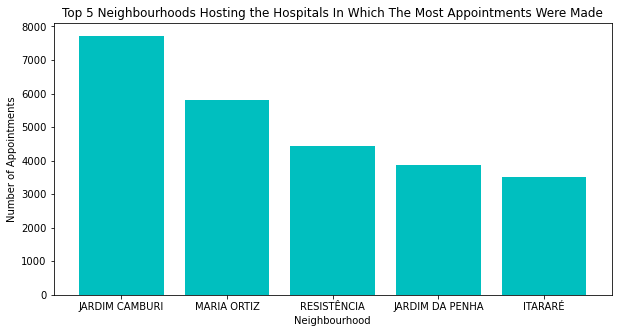

In [466]:
#plot to show the neighbourhoods with the most appointments received
neigh = df.neighbourhood.value_counts()[0:5]

plt.subplots(figsize = (10,5));
plt.bar(neigh.index, neigh, color = 'c');
plt.title("Top 5 Neighbourhoods Hosting the Hospitals In Which The Most Appointments Were Made")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Appointments")
plt.show()

**As can be seen from the plot above, the hospital(s) with the most appointments are situated in `JARDIM CAMBURI`, with a total of `7,717` appointments.**

### Exploring the `gender` column

Here we will use a simple pie chart to see the number and percentage of men to women covered in this data set

In [474]:
#to check the number of male and female patients covered in this dataset
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

We see here that the number of Female patients we had is almost double of the number of Male patients, let's visualize this with a pie chart



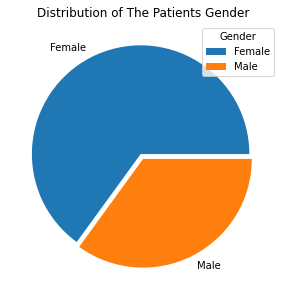

In [475]:
#plot a pie for the gender distribution of patients
m_f = df.gender.value_counts()
mylabels = ["Female", "Male"]
myexplode = [0.05, 0]
plt.subplots(figsize =(10,5))
plt.pie(m_f, labels = mylabels, explode = myexplode)
plt.title("Distribution of The Patients Gender");
plt.legend(title = "Gender")
plt.show();

**With a percentage distribution of `65% : 35%`, female patients who arranged appointments were substantially more than male patients.**

***We might claim that women are more prone to health issues and require more medical appointments than males, but this is merely a guess because we lack sufficient information to back it up.***

### Exploring the `scholarship` culomn

Here also we will use a pie chart to visualize the distribution of our scolarship column. We want to find ou how many patients were on scholarship and how many were not.

In [476]:
#to check the number of patients who were on scolarship and those who were not
df.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

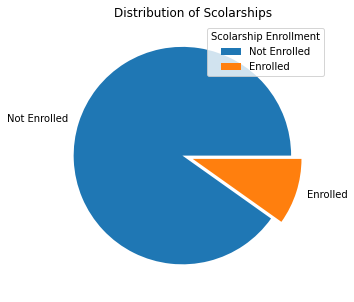

In [553]:
#plot this distribution with a piechart
schol = df.scholarship.value_counts()

mylabels = ["Not Enrolled", "Enrolled"]
myexplode = [0.1, 0]
plt.subplots(figsize =(15,5))
plt.pie(schol, labels = mylabels, explode = myexplode )
plt.title("Distribution of Scolarships");
plt.legend(title = "Scolarship Enrollment")
plt.show();

**With a percentage distribution of `90% : 10%`, we can see that there is a fairly large disparity between those who were not enrolled in the scholarship program and those who were.**

***The Brazilian Welfare Program `Bolsa Familia` is the name of the scholarship program. The details in this dataset do not provide us with an exact reason why many more people are not enrolled in the program, but we can speculate that health scholarships are generally very expensive, which is why the scholarship program's facilitators might have been unable to enroll many more people into the program***

**NOTE: This hypothesis is purely speculative and not definitive**

### Exploring the `handicap` Column

**Here we are only interested in knowing how many of the patients were handicaped**

In [477]:
#check the distribution of the handicap column
df.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

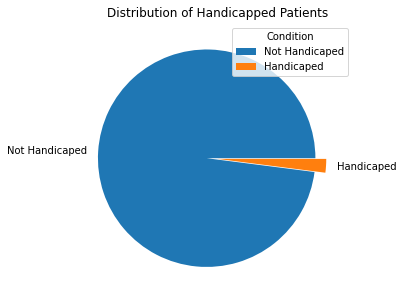

In [246]:
#plot this distribution with a piechart
handi = df.handicap.value_counts()

mylabels = ["Not Handicaped", "Handicaped"]
myexplode = [0.1, 0]
plt.subplots(figsize =(15,5))
plt.pie(handi, labels = mylabels, explode = myexplode)
plt.title("Distribution of Handicapped Patients");
plt.legend(title = "Condition")
plt.show();

***We can observe that just `2,241` patients are handicapped, accounting for around `2%` of our entire patient population***

### Exploring the `diabetes` Column

**Here we are only interested in knowing how many of the patients were Diabetic**

In [478]:
#check the distribution of the diabetis column
df.diabetes.value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

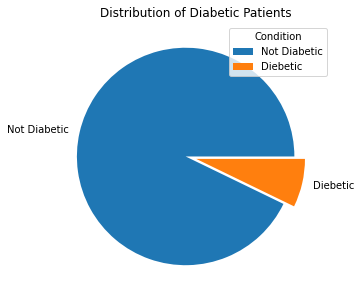

In [247]:
#plot this distribution with a piechart
diab = df.diabetes.value_counts()

mylabels = ["Not Diabetic", "Diebetic"]
myexplode = [0.1, 0]
plt.subplots(figsize =(15,5))
plt.pie(diab, labels = mylabels, explode = myexplode)
plt.title("Distribution of Diabetic Patients");
plt.legend(title = "Condition")
plt.show();

***Here we see that only `7,943` patients are diabetic which is about `7%` ONLY of our total patients population***

### Exploring the `alcoholism` Column

**Here we are only interested in knowing how many of the patients were Alcoholic**

In [248]:
#check the distribution of the alcoholism column
df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

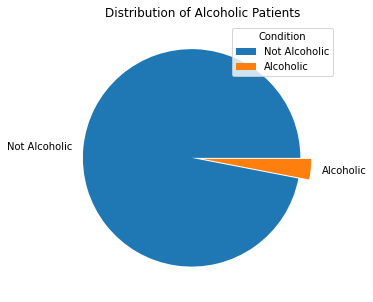

In [250]:
#plot this distribution with a piechart
alc = df.alcoholism.value_counts()

mylabels = ["Not Alcoholic", "Alcoholic"]
myexplode = [0.1, 0]
plt.subplots(figsize =(15,5))
plt.pie(alc, labels = mylabels, explode = myexplode)
plt.title("Distribution of Alcoholic Patients");
plt.legend(title = "Condition")
plt.show();

***We can observe that just `3,369` of our patients are alcoholics, which is around `3%` of our overall patient population***

### Exploring the `hipertension` Column

**Here we are only interested in knowing how many of the patients were hipertensive**

In [479]:
#check the distribution of the hipertension column
df.hipertension.value_counts()

0    88726
1    21801
Name: hipertension, dtype: int64

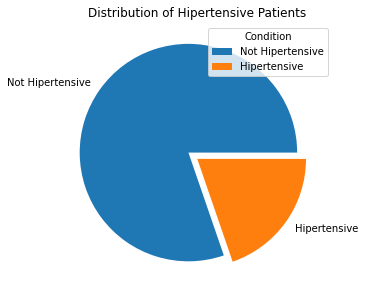

In [252]:
#plot this distribution with a piechart
hiper = df.hipertension.value_counts()

mylabels = ["Not Hipertensive", "Hipertensive"]
myexplode = [0.1, 0]
plt.subplots(figsize =(15,5))
plt.pie(hiper, labels = mylabels, explode = myexplode)
plt.title("Distribution of Hipertensive Patients");
plt.legend(title = "Condition")
plt.show();

***Here we see that `21,801` patients are hipertensive which is about `20%` of our total patients population***

***In general, the percentage of patients who are handicapped, diabetic, or alcoholic amounts to roughly `12%` of the total patient population. This indicates that `12%` of the patients were handicapped, alcoholic, or diabetic, `20%` of the patients were hypertensive, and the remaining `68%` had other health issues not stated above.***

### Exploring the `sms_received` Column

**Here we are  interested in knowing how many of the patients received text messages reminding them of their appointment before the day comes**

In [480]:
#check the distribution of the sms_received column
df.sms_received.value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

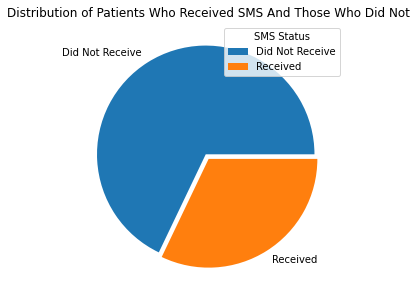

In [259]:
#plot this distribution with a piechart
sms_rec = df.sms_received.value_counts()

mylabels = ["Did Not Receive", "Received"]
myexplode = [0.05, 0]
plt.subplots(figsize =(15,5))
plt.pie(sms_rec, labels = mylabels, explode = myexplode)
plt.title("Distribution of Patients Who Received SMS And Those Who Did Not");
plt.legend(title = "SMS Status")
plt.show();

**As can be seen from the chart above, quite a number of people did not receive a reminder SMS compared to those who did, with a percentage distribution of about `68% : 32%`**

***As we progress through our EDA, we'll see if receiving an SMS reminder affects the patients' attendance at their appointments***

### Exploring the `no_show` Column

**Finally in this phase, we will find the total number of patients who finnaly showed up for their appointment and those who did not**

**As we proceed in this project, We will determine the columns that had a significant influence on this column (i.e. the variables that had a significant impact on patients turning up for their scheduled appointments or not)**

In [481]:
#check the distribution of the no_show column
df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

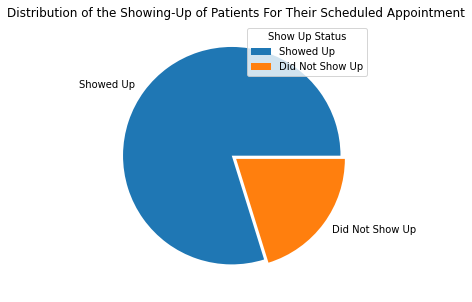

In [262]:
#plot this distribution with a piechart
show = df.no_show.value_counts()

mylabels = ["Showed Up", "Did Not Show Up"]
myexplode = [0.05, 0]
plt.subplots(figsize =(15,5))
plt.pie(show, labels = mylabels, explode = myexplode)
plt.title("Distribution of the Showing-Up of Patients For Their Scheduled Appointment");
plt.legend(title = "Show Up Status")
plt.show();

***As indicated in the chart above, the vast majority of people who planned medical appointments actually showed up. Only approximately `20%` of patients did not show up for their appointment, while about `80%` did.***


**The next set of Explorations are aimed at determining the major factors responsible for these Patients showing up for their appointments or not.**

### Research Question 1 :  Does the number of days of waiting affect showing up ?

**For this question, we'll see if the number of days patients had to wait until their appointment eventually arrived had an impact on their attendance(i.e their showing up).**



**Recall from a previous finding that the average number of days our patients had to wait before their appoinmnet day came was `10 days`. So we will consider `10 days` as the `normal` waiting day period.**

***Now, let's see show-up status of patients whose waiting days were between `0 days to 10 days`***

In [482]:
#use pandas groupby to check the show-up status of all waiting days
df.groupby(['waiting_days', 'no_show']).count()

gender  scheduledday  appointmentday    age  age_group  \
waiting_days no_show                                                           
0            No        36771         36771           36771  36771      35413   
             Yes        1797          1797            1797   1797       1746   
1            No         4100          4100            4100   4100       3953   
             Yes        1113          1113            1113   1113       1075   
2            No         5123          5123            5123   5123       5052   
...                      ...           ...             ...    ...        ...   
169          Yes           1             1               1      1          1   
176          No           10            10              10     10         10   
             Yes           6             6               6      6          6   
179          No            8             8               8      8          8   
             Yes           2             2               2      2          2   

                      neighbourhood  scholarship  hipertension  diabetes  \
waiting_days no_show                                                       
0            No               36771        36771         36771     36771   
             Yes               1797         1797          1797      1797   
1            No                4100         4100          4100      4100   
             Yes               1113         1113          1113      1113   
2            No                5123         5123          5123      5123   
...                             ...          ...           ...       ...   
169          Yes                  1            1             1         1   
176          No                  10           10            10        10   
             Yes                  6            6             6         6   
179          No                   8            8             8         8   
             Yes                  2            2             2         2   

                      alcoholism  handicap  sms_received  
waiting_days no_show                                      
0            No            36771     36771         36771  
             Yes            1797      1797          1797  
1            No             4100      4100          4100  
             Yes            1113      1113          1113  
2            No             5123      5123          5123  
...                          ...       ...           ...  
169          Yes               1         1             1  
176          No               10        10            10  
             Yes               6         6             6  
179          No                8         8             8  
             Yes               2         2             2  

[235 rows x 12 columns]

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [483]:
#pick an arbitrary column 'age'
df.groupby(['waiting_days', 'no_show']).age.count()

waiting_days  no_show
0             No         36771
              Yes         1797
1             No          4100
              Yes         1113
2             No          5123
                         ...  
169           Yes            1
176           No            10
              Yes            6
179           No             8
              Yes            2
Name: age, Length: 235, dtype: int64

In [484]:
#assign to a variable name
normal_waiting = df.groupby(['waiting_days', 'no_show']).age.count()

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [485]:
#get the total counts for  waiting days using our arbitrary column 'age'
df.groupby('waiting_days').age.count()

waiting_days
0      38568
1       5213
2       6725
3       2737
4       5290
       ...  
155       10
162       11
169        8
176       16
179       10
Name: age, Length: 129, dtype: int64

In [486]:
#assign to a variable name 'total_waiting'
total_waiting = df.groupby('waiting_days').age.count()

In [487]:
#get the proportion of waiting days and show-up status
prop_waiting = normal_waiting / total_waiting
prop_waiting

waiting_days  no_show
0             No         0.953407
              Yes        0.046593
1             No         0.786495
              Yes        0.213505
2             No         0.761784
                           ...   
169           Yes        0.125000
176           No         0.625000
              Yes        0.375000
179           No         0.800000
              Yes        0.200000
Name: age, Length: 235, dtype: float64

In [488]:
#we need only the ouput for 0 - 10 waiting days
prop_waiting[0 : 22]

waiting_days  no_show
0             No         0.953407
              Yes        0.046593
1             No         0.786495
              Yes        0.213505
2             No         0.761784
              Yes        0.238216
3             No         0.764706
              Yes        0.235294
4             No         0.767297
              Yes        0.232703
5             No         0.733903
              Yes        0.266097
6             No         0.752044
              Yes        0.247956
7             No         0.733184
              Yes        0.266816
8             No         0.712693
              Yes        0.287307
9             No         0.725857
              Yes        0.274143
10            No         0.683681
              Yes        0.316319
Name: age, dtype: float64

In [489]:
#asssign to prop_waiting because that what we want to plot
prop_waiting = prop_waiting[0 : 22]

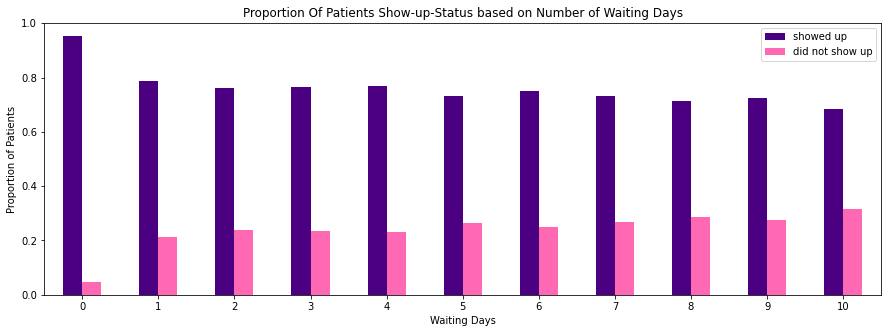

In [555]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on the waiting days
prop_waiting.unstack().plot(kind='bar', figsize =(15, 5), color =('#4B0082','#FF69B4'))
plt.title("Proportion Of Patients Show-up-Status based on Number of Waiting Days")
plt.xlabel('Waiting Days')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();


**The preceding graph is pretty clear in that it indicates that as the number of waiting days increased, so did the number of patients who failed to show up for their appointments. This suggests that the number of waiting days has a significant influence on whether or not a patient shows up for his or her appointment.**


***To analyze this further, let's assume  our normaol waiting days to be `20 days` rather than the average `(10 days)`. Let's see whether this pattern persists***

In [491]:
#let's get the proportion again
prop_waiting1 = normal_waiting / total_waiting
prop_waiting1

waiting_days  no_show
0             No         0.953407
              Yes        0.046593
1             No         0.786495
              Yes        0.213505
2             No         0.761784
                           ...   
169           Yes        0.125000
176           No         0.625000
              Yes        0.375000
179           No         0.800000
              Yes        0.200000
Name: age, Length: 235, dtype: float64

In [302]:
#now, we need the ouput for 0 - 20 waiting days
prop_waiting1[0:42]

waiting_days  no_show
0             No         0.953407
              Yes        0.046593
1             No         0.786495
              Yes        0.213505
2             No         0.761784
              Yes        0.238216
3             No         0.764706
              Yes        0.235294
4             No         0.767297
              Yes        0.232703
5             No         0.733903
              Yes        0.266097
6             No         0.752044
              Yes        0.247956
7             No         0.733184
              Yes        0.266816
8             No         0.712693
              Yes        0.287307
9             No         0.725857
              Yes        0.274143
10            No         0.683681
              Yes        0.316319
11            No         0.683891
              Yes        0.316109
12            No         0.683408
              Yes        0.316592
13            No         0.681332
              Yes        0.318668
14            No         0

In [492]:
#assign to the variable name 'Prop_waiting1'
prop_waiting1 = prop_waiting1[0:42]

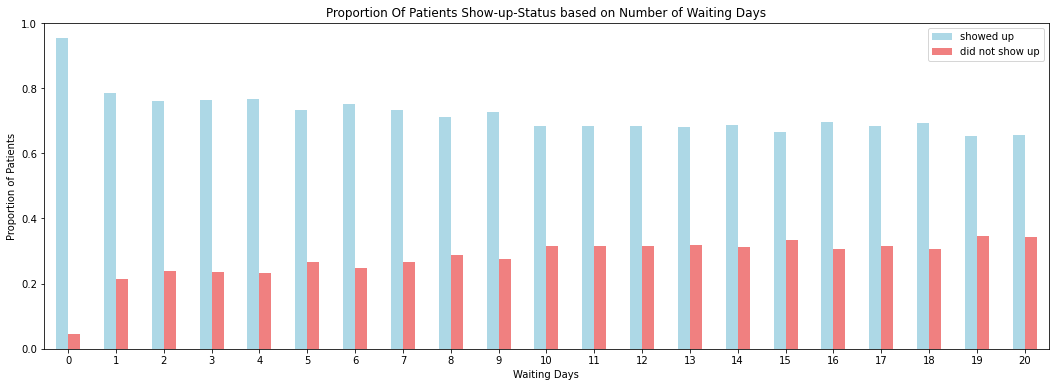

In [557]:
#create another clustered column chart to check the 
prop_waiting1.unstack().plot(kind='bar', figsize =(18, 6), color = ('#ADD8E6','#F08080'))
plt.title("Proportion Of Patients Show-up-Status based on Number of Waiting Days")
plt.xlabel('Waiting Days')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();

**What we see here is a validation of our initial plot, where we assumed the normal waiting days to be `10 days`. Now that the normal waiting days have been extended to `20 days`, the trend has persisted, i.e., as the number of waiting days increased, the number of patients who failed to show up for their appointments increased.**

***Hence to answer our question, "YES, The Number of Waiting Days affects/determines the Showing up of patients for their Medical appointments"*** 

### Research Question 2 :  Does Patients age affect showing up? 

*For this question, we could have used the ages column but since the data points are so much our plot won't be organized at all hence our `age_group` column will come in handy to help answer this question*

***Now, let's look at the show-up status of the different age groups***

In [494]:
#use pandas groupby to check the show-up status of all age groups
df.groupby(['age_group', 'no_show']).count()

gender  scheduledday  appointmentday  waiting_days    age  \
age_group no_show                                                              
0-5       No         6646          6646            6646          6646   6646   
          Yes        1546          1546            1546          1546   1546   
6-10      No         5415          5415            5415          5415   5415   
          Yes        1603          1603            1603          1603   1603   
11-17     No         6421          6421            6421          6421   6421   
          Yes        2209          2209            2209          2209   2209   
18-35     No        19521         19521           19521         19521  19521   
          Yes        6103          6103            6103          6103   6103   
36-55     No        24103         24103           24103         24103  24103   
          Yes        5916          5916            5916          5916   5916   
56-75     No        18679         18679           18679         18679  18679   
          Yes        3433          3433            3433          3433   3433   
76+       No         4522          4522            4522          4522   4522   
          Yes         870           870             870           870    870   

                   neighbourhood  scholarship  hipertension  diabetes  \
age_group no_show                                                       
0-5       No                6646         6646          6646      6646   
          Yes               1546         1546          1546      1546   
6-10      No                5415         5415          5415      5415   
          Yes               1603         1603          1603      1603   
11-17     No                6421         6421          6421      6421   
          Yes               2209         2209          2209      2209   
18-35     No               19521        19521         19521     19521   
          Yes               6103         6103          6103      6103   
36-55     No               24103        24103         24103     24103   
          Yes               5916         5916          5916      5916   
56-75     No               18679        18679         18679     18679   
          Yes               3433         3433          3433      3433   
76+       No                4522         4522          4522      4522   
          Yes                870          870           870       870   

                   alcoholism  handicap  sms_received  
age_group no_show                                      
0-5       No             6646      6646          6646  
          Yes            1546      1546          1546  
6-10      No             5415      5415          5415  
          Yes            1603      1603          1603  
11-17     No             6421      6421          6421  
          Yes            2209      2209          2209  
18-35     No            19521     19521         19521  
          Yes            6103      6103          6103  
36-55     No            24103     24103         24103  
          Yes            5916      5916          5916  
56-75     No            18679     18679         18679  
          Yes            3433      3433          3433  
76+       No             4522      4522          4522  
          Yes             870       870           870

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [495]:
#pick an arbitrary column 'age'
df.groupby(['age_group', 'no_show']).age.count()

age_group  no_show
0-5        No          6646
           Yes         1546
6-10       No          5415
           Yes         1603
11-17      No          6421
           Yes         2209
18-35      No         19521
           Yes         6103
36-55      No         24103
           Yes         5916
56-75      No         18679
           Yes         3433
76+        No          4522
           Yes          870
Name: age, dtype: int64

In [496]:
#assign to a variable name
age_grp = df.groupby(['age_group', 'no_show']).age.count()

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [497]:
#get the total counts for  waiting days using our arbitrary column 'age' and assign to a variable name 
tot_age_grp = df.groupby('age_group').age.count()
tot_age_grp

age_group
0-5       8192
6-10      7018
11-17     8630
18-35    25624
36-55    30019
56-75    22112
76+       5392
Name: age, dtype: int64

In [498]:
#get the proportion af age_group and show up status
prop_age_grp = age_grp / tot_age_grp
prop_age_grp

age_group  no_show
0-5        No         0.811279
           Yes        0.188721
6-10       No         0.771587
           Yes        0.228413
11-17      No         0.744032
           Yes        0.255968
18-35      No         0.761825
           Yes        0.238175
36-55      No         0.802925
           Yes        0.197075
56-75      No         0.844745
           Yes        0.155255
76+        No         0.838650
           Yes        0.161350
Name: age, dtype: float64

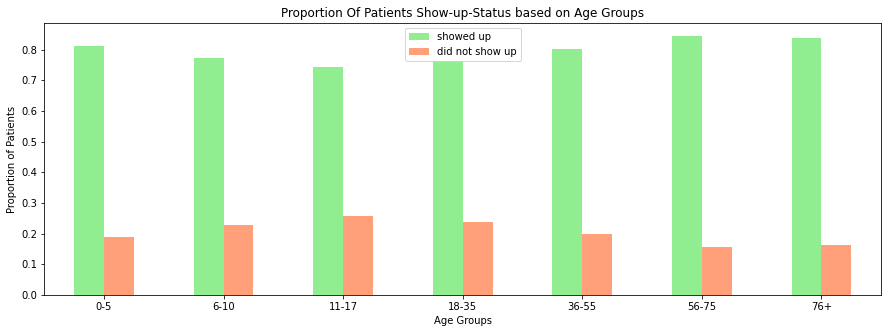

In [558]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on the age groups
prop_age_grp.unstack().plot(kind='bar', figsize =(15, 5), color =('#90EE90','#FFA07A'))
plt.title("Proportion Of Patients Show-up-Status based on Age Groups")
plt.xlabel('Age Groups')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();


**The plot shows us that for patients from the ages of `0 to 17`, there is an increase in the proportions of those who do not keep up/show up for their appointment but for patients from the ages of `18 to 35` the reverse is the case, there is an increase in the proportions of patients who show up for their appointment and a reduction in proportion of patients who do not show up for their medical appointments**

Below is an assumption of the reason for the above discovery (please note that this is tentative)

> ***People between the ages of 0 and 17 are young, agile, and have fewer health issues issues and complications; as a result, they do not see a need to be responsible with their health or take their health seriously due to their mostly healthy state. Whereas, the other age groups  are  those ages when people begin to notice signs of health issues and complications; as a result, they see a great need to be very responsible with their health. They take every medical appointment seriously at this age, and they understand the importance of attending every medical appointment they have scheduled.***

***Hence, to answer our question, YES, Age does affect the showing up of patients for their Medical Appointments***

### Research Question 3 : Does being handicapped affect  showing up or not ?

***Here we will explore the show up status of patients who are handcaped compared to those who are not***

In [500]:
#use pandas groupby to check the show-up status of the handicap column
df.groupby(['handicap', 'no_show']).count()

gender  scheduledday  appointmentday  waiting_days    age  \
handicap no_show                                                              
0        No        86374         86374           86374         86374  86374   
         Yes       21912         21912           21912         21912  21912   
1        No         1834          1834            1834          1834   1834   
         Yes         407           407             407           407    407   

                  age_group  neighbourhood  scholarship  hipertension  \
handicap no_show                                                        
0        No           83474          86374        86374         86374   
         Yes          21273          21912        21912         21912   
1        No            1833           1834         1834          1834   
         Yes            407            407          407           407   

                  diabetes  alcoholism  sms_received  
handicap no_show                                      
0        No          86374       86374         86374  
         Yes         21912       21912         21912  
1        No           1834        1834          1834  
         Yes           407         407           407

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [501]:
#Pick an arbitrary column 'age' and assign to a variable name
hand = df.groupby(['handicap', 'no_show']).age.count()
hand

handicap  no_show
0         No         86374
          Yes        21912
1         No          1834
          Yes          407
Name: age, dtype: int64

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [502]:
#get the total counts for handicaps using our arbitrary column 'age' and assign to a variable name 
tot_hand = df.groupby('handicap').age.count()
tot_hand

handicap
0    108286
1      2241
Name: age, dtype: int64

In [503]:
#calculate the proportion of handicaps grouped by show up status
prop_hand = hand / tot_hand
prop_hand

handicap  no_show
0         No         0.797647
          Yes        0.202353
1         No         0.818385
          Yes        0.181615
Name: age, dtype: float64

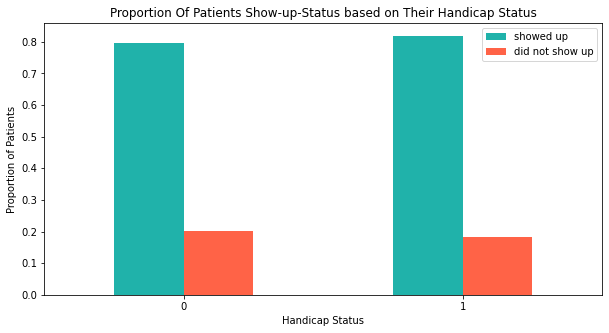

In [567]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on whwther they were handicaped or not
prop_hand.unstack().plot(kind='bar', figsize =(10, 5), color = ('#20B2AA', '#FF6347'))
plt.title("Proportion Of Patients Show-up-Status based on Their Handicap Status")
plt.xlabel('Handicap Status')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();

`value 0 represent patients who were not handicapped`

`Value 1 represents Patients who were handicapped`

**The plot above shows us that the patients who were handcicaped showed up for their appointments more than those who were not handicapped and those who were not handicapped missed more appointments than those who were handicapped**

***Hence to answer our question "Being Handicaped Does not necessarily affect the showing up of Patients for their medical appointments"***

### Research Question 4 : Does being Diabetic affect  showing up or not ?

***Here we will explore the show up status of patients who are diabetic compared to those who are not***

In [505]:
#use pandas groupby to check the show-up status of the diabetes column
df.groupby(['diabetes', 'no_show']).count()

gender  scheduledday  appointmentday  waiting_days    age  \
diabetes no_show                                                              
0        No        81695         81695           81695         81695  81695   
         Yes       20889         20889           20889         20889  20889   
1        No         6513          6513            6513          6513   6513   
         Yes        1430          1430            1430          1430   1430   

                  age_group  neighbourhood  scholarship  hipertension  \
diabetes no_show                                                        
0        No           78794          81695        81695         81695   
         Yes          20250          20889        20889         20889   
1        No            6513           6513         6513          6513   
         Yes           1430           1430         1430          1430   

                  alcoholism  handicap  sms_received  
diabetes no_show                                      
0        No            81695     81695         81695  
         Yes           20889     20889         20889  
1        No             6513      6513          6513  
         Yes            1430      1430          1430

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [506]:
#Pick an arbitrary column 'age' and assign to a variable name
diab = df.groupby(['diabetes', 'no_show']).age.count()
diab

diabetes  no_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: age, dtype: int64

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [542]:
#get the total counts for diabetes patients using our arbitrary column 'age' and assign to a variable name 
tot_diab = df.groupby('diabetes').age.count()
tot_diab

diabetes
0    102584
1      7943
Name: age, dtype: int64

In [541]:
#calculate the proportion of diabetes patients grouped by show up status
prop_diab = diab / tot_diab
prop_diab

diabetes  no_show
0         No         0.796372
          Yes        0.203628
1         No         0.819967
          Yes        0.180033
Name: age, dtype: float64

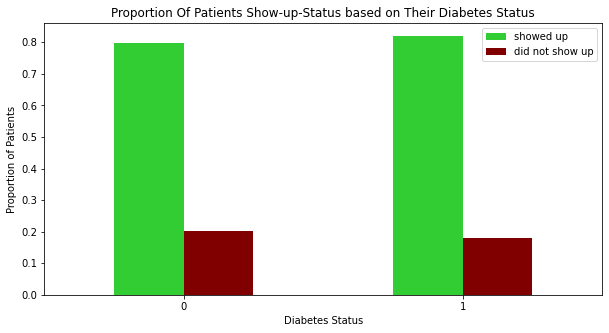

In [560]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on whwther they were diabetic or not
prop_diab.unstack().plot(kind='bar', figsize =(10, 5), color = ('#32CD32', '#800000'))
plt.title("Proportion Of Patients Show-up-Status based on Their Diabetes Status")
plt.xlabel('Diabetes Status')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();


`value 0 represent patients who were not Diabetic`

`Value 1 represents Patients who were Diabetic`

**The plot above shows us that the patients who were diabetic showed up for their appointments more than those who were not diabetic and those who were not diabetic missed more appointments than those who were.**

***Hence to answer our question "Being Diabetic Does not necessarily affect the showing up of Patients for their medical appointments"***

### Research Question 5 : Does being Alcoholic affect  showing up or not ?

***Here we will explore the show up status of patients who are Alcoholic compared to those who are not***

In [510]:
#use pandas groupby to check the show-up status of the Alcoholism column
df.groupby(['alcoholism', 'no_show']).count()

gender  scheduledday  appointmentday  waiting_days    age  \
alcoholism no_show                                                              
0          No        85525         85525           85525         85525  85525   
           Yes       21642         21642           21642         21642  21642   
1          No         2683          2683            2683          2683   2683   
           Yes         677           677             677           677    677   

                    age_group  neighbourhood  scholarship  hipertension  \
alcoholism no_show                                                        
0          No           82624          85525        85525         85525   
           Yes          21003          21642        21642         21642   
1          No            2683           2683         2683          2683   
           Yes            677            677          677           677   

                    diabetes  handicap  sms_received  
alcoholism no_show                                    
0          No          85525     85525         85525  
           Yes         21642     21642         21642  
1          No           2683      2683          2683  
           Yes           677       677           677

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [511]:
#Pick an arbitrary column 'age' and assign to a variable name
alco = df.groupby(['alcoholism', 'no_show']).age.count()
alco

alcoholism  no_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: age, dtype: int64

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [512]:
#get the total counts for alcoholics using our arbitrary column 'age' and assign to a variable name 
tot_alco = df.groupby('alcoholism').age.count()
tot_alco

alcoholism
0    107167
1      3360
Name: age, dtype: int64

In [513]:
#calculate the proportion of alcoholics grouped by show up status
prop_alco = alco / tot_alco
prop_alco

alcoholism  no_show
0           No         0.798054
            Yes        0.201946
1           No         0.798512
            Yes        0.201488
Name: age, dtype: float64

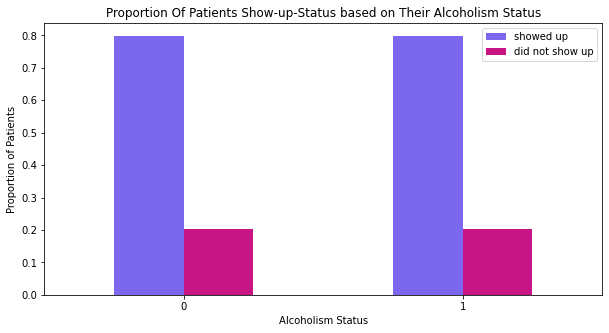

In [561]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on whwther they were alcoholic or not
prop_alco.unstack().plot(kind='bar', figsize =(10, 5), color = ('#7B68EE' , '#C71585'))
plt.title("Proportion Of Patients Show-up-Status based on Their Alcoholism Status")
plt.xlabel('Alcoholism Status')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();


`value 0 represent patients who were not Alcoholic`

`Value 1 represents Patients who were Alcoholic`

**The plot above shows us that there is no significant difference between the showup status of Alcoholic patients and non alcoholic patients**

***Hence to answer our question "Being Alcoholic Does not necessarily affect the showing up of Patients for their medical appointments"***

### Research Question 6 : Does being Hipertensive affect  showing  up or not ?

***Here we will explore the show up status of patients who are Hipertensive compared to those who are not***

In [515]:
#use pandas groupby to check the show-up status of the Hipertension column
df.groupby(['hipertension', 'no_show']).count()

gender  scheduledday  appointmentday  waiting_days  \
hipertension no_show                                                       
0            No        70179         70179           70179         70179   
             Yes       18547         18547           18547         18547   
1            No        18029         18029           18029         18029   
             Yes        3772          3772            3772          3772   

                        age  age_group  neighbourhood  scholarship  diabetes  \
hipertension no_show                                                           
0            No       70179      67278          70179        70179     70179   
             Yes      18547      17908          18547        18547     18547   
1            No       18029      18029          18029        18029     18029   
             Yes       3772       3772           3772         3772      3772   

                      alcoholism  handicap  sms_received  
hipertension no_show                                      
0            No            70179     70179         70179  
             Yes           18547     18547         18547  
1            No            18029     18029         18029  
             Yes            3772      3772          3772

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [516]:
#Pick an arbitrary column 'age' and assign to a variable name
hiper = df.groupby(['hipertension', 'no_show']).age.count()
hiper

hipertension  no_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: age, dtype: int64

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [517]:
#get the total counts for Hipertension using our arbitrary column 'age' and assign to a variale name 
tot_hiper = df.groupby('hipertension').age.count()
tot_hiper

hipertension
0    88726
1    21801
Name: age, dtype: int64

In [518]:
#calculate the proportion of Hipertensive patients grouped by show up status
prop_hiper = hiper / tot_hiper
prop_hiper

hipertension  no_show
0             No         0.790963
              Yes        0.209037
1             No         0.826980
              Yes        0.173020
Name: age, dtype: float64

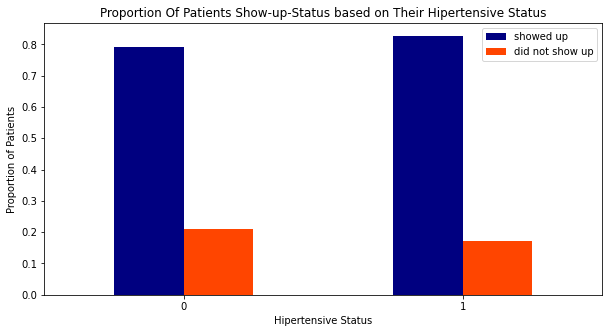

In [562]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on whwther they were hipertensive or not
prop_hiper.unstack().plot(kind='bar', figsize =(10, 5), color =('#000080', '#FF4500'))
plt.title("Proportion Of Patients Show-up-Status based on Their Hipertensive Status")
plt.xlabel('Hipertensive Status')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();


`value 0 represent patients who were not hipertensive`

`Value 1 represents Patients who were hipertensive`

**The plot above shows us that the patients who were hipertensive showed up for their appointments more than those who were not hipertensive and those who were not hipertensive missed more appointments than those who were.**


***Hence to answer our question "Being Hipertensive Does not necessarily affect the showing up of Patients for their medical appointments"***

### Research Question 7: Does enrollment in scholarship affect  showing  up for appointment?

***Here we will explore the show up status of patients who were enrolled in the `Bolsa Familia` scholarship program and those who were not enrolled***

In [520]:
#use pandas groupby to check the show-up status of the scholarship column
df.groupby(['scholarship', 'no_show']).count()

gender  scheduledday  appointmentday  waiting_days  \
scholarship no_show                                                       
0           No        79925         79925           79925         79925   
            Yes       19741         19741           19741         19741   
1           No         8283          8283            8283          8283   
            Yes        2578          2578            2578          2578   

                       age  age_group  neighbourhood  hipertension  diabetes  \
scholarship no_show                                                            
0           No       79925      77069          79925         79925     79925   
            Yes      19741      19109          19741         19741     19741   
1           No        8283       8238           8283          8283      8283   
            Yes       2578       2571           2578          2578      2578   

                     alcoholism  handicap  sms_received  
scholarship no_show                                      
0           No            79925     79925         79925  
            Yes           19741     19741         19741  
1           No             8283      8283          8283  
            Yes            2578      2578          2578

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [521]:
#Pick an arbitrary column 'age' and assign to a variable name
schol = df.groupby(['scholarship', 'no_show']).age.count()
schol

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: age, dtype: int64

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [522]:
#get the total counts for scholarship enrollment using our arbitrary column 'age' and assign to a variable name 
tot_schol = df.groupby('scholarship').age.count()
tot_schol

scholarship
0    99666
1    10861
Name: age, dtype: int64

In [523]:
#calculate the proportion of Hipertensive patients grouped by show up status
prop_schol = schol / tot_schol
prop_schol

scholarship  no_show
0            No         0.801928
             Yes        0.198072
1            No         0.762637
             Yes        0.237363
Name: age, dtype: float64

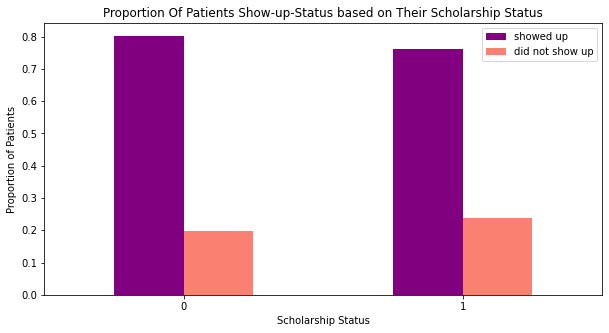

In [563]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on whether they were enrolled in the scolarship or not
prop_schol.unstack().plot(kind='bar', figsize =(10, 5), color = ('#800080', '#FA8072'))
plt.title("Proportion Of Patients Show-up-Status based on Their Scholarship Status")
plt.xlabel('Scholarship Status')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();


`value 0 represent patients who were not enrolled in the scolarship`

`Value 1 represents Patients who were enrolled in the scholarship`

**The plot above shows us that the patients who were not enrolled in the sccholarship showed up for their appointments more than those who were enrolled and those who were  enrolled  missed more appointments than those who were not.**


Below is a tentative assumption as to why this was so;

> ***It is supposed that the scholarship covers the cost of the appointment and treatment, so those who are not paying anything out of pocket and are on a scholarship should show up more, but the fact is that most people take things for granted that they do not have to pay for.
As a result, unlike those who will pay for the appointment out of pocket, individuals on scholarship are more likely to take it for granted because they are not paying for it.
Hence, this is most likely the reason why individuals who were enrolled in the scholarship turned up less frequently than those who were not.***


***Hence to answer our question "Being enrolled in the scholarship Does not necessarily affect the showing up of Patients for their medical appointments"***

### Research Question 8 :Which category of people showed up the most among those who received SMS and those who did not?

***Here we will explore the show up status of patients who received reminder SMS and those who did not***

In [525]:
#use pandas groupby to check the show-up status of the sms_received column
df.groupby(['sms_received', 'no_show']).count()

gender  scheduledday  appointmentday  waiting_days  \
sms_received no_show                                                       
0            No        62510         62510           62510         62510   
             Yes       12535         12535           12535         12535   
1            No        25698         25698           25698         25698   
             Yes        9784          9784            9784          9784   

                        age  age_group  neighbourhood  scholarship  \
sms_received no_show                                                 
0            No       62510      60290          62510        62510   
             Yes      12535      12112          12535        12535   
1            No       25698      25017          25698        25698   
             Yes       9784       9568           9784         9784   

                      hipertension  diabetes  alcoholism  handicap  
sms_received no_show                                                
0            No              62510     62510       62510     62510  
             Yes             12535     12535       12535     12535  
1            No              25698     25698       25698     25698  
             Yes              9784      9784        9784      9784

**Since its a count, all values will be the same in all columns So, lets pick an arbitrary column 'age'**

In [526]:
#Pick an arbitrary column 'age' and assign to a variable name
sms_rec = df.groupby(['sms_received', 'no_show']).age.count()
sms_rec

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: age, dtype: int64

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [527]:
#get the total counts for sms_received using our arbitrary column 'age' and assign to a variable name 
tot_sms = df.groupby('sms_received').age.count()
tot_sms

sms_received
0    75045
1    35482
Name: age, dtype: int64

In [528]:
#calculate the proportion of sms_received grouped by show up status
prop_sms = sms_rec / tot_sms
prop_sms

sms_received  no_show
0             No         0.832967
              Yes        0.167033
1             No         0.724255
              Yes        0.275745
Name: age, dtype: float64

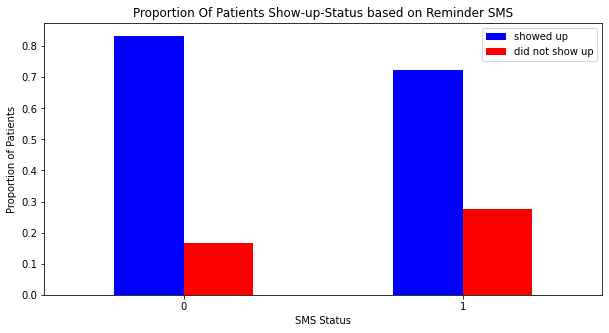

In [529]:
#now, plot a clustered column chart to check the proportion of the patients show up status based on whether or not they received the reminder sms or not
prop_sms.unstack().plot(kind='bar', figsize =(10, 5), color =('b','r'))
plt.title("Proportion Of Patients Show-up-Status based on Reminder SMS")
plt.xlabel('SMS Status')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['showed up', 'did not show up']);
plt.xticks(rotation = 0)
plt.show();


`value 0 represent patients who did not receive SMS`

`Value 1 represents Patients who received SMS`

**To answer our question, those who did not receive reminder SMS showed up for their appointments more than those who received reminder SMS and the difference is a very significant one**

The Scenairo below is an attempt to explain why this was so. Although it's not conclusive, it's just an assumption

> ***It's presumed that the SMS messages sent were  text messages reminding patients to show up for their scheduled appointments, and that they were sent a day or two before the appointment.***

> **The reason these patients who received reminder text messages did not show up as expected could be that they had scheduled their appointments and had to wait longer than the normal waiting days(10-14 days) So, the appointment must have skipped their minds, and may have made other plans for that day, and since the reminder SMS were sent a day to the actual appointment date, it might not give them the luxury of time to reschedule their day  Hence,  missing their appointments was pretty much inevitable**


**The question we will be answering next might help us to further solidify this assupmtion or maybe give us further insight**

### Research Question 9:  What was the average waiting days for those who received sms and those who did not?

In [369]:
#use pandas groupby to group the dataframe by the sms_received column and call out the count of the waiting_days
df.groupby('sms_received').waiting_days.value_counts()

sms_received  waiting_days
0             0               38568
              2                6725
              1                5213
              4                2236
              7                2056
                              ...  
1             127                 1
              132                 1
              139                 1
              146                 1
              151                 1
Name: waiting_days, Length: 234, dtype: int64

In [370]:
#use pandas groupby to group the dataframe by the sms_received column and call out the mean of the waiting_days
df.groupby('sms_received').waiting_days.mean()

sms_received
0     6.007502
1    19.016713
Name: waiting_days, dtype: float64

**The result above shows us that the avearage number of days in which pateints who did not receive reminder sms had to wait before their appointment day came was ` days` while the avearage number of days in which pateints who received reminder sms had to wait before their appointment day came was `19 days`**

***Looking at these numbers objectively, it furthers our assumption from the preceding question (question 8) to some extent . Individuals who received sms had longer waiting  days than those who did not, thus their appointments slipped their minds for one reason or another, and they ultimately missed their appointments. This is why, despite receiving the SMS, they failed to show up for their appointments.***

**Please NOTE THAT THIS IS ONLY AN ASSUMPTION, IT IS NOT IN ANY WAY CONCLUSIVE**

### Research Question 10: What are the top 5 neighbourhood in which the most appointment show up was recorded ?

***For  this question, we will be pointing out the top 5 neighbourhoods hosting the hospitals where patients showed up the most for their appointments***

In [530]:
#create a new dataframe from the dataframe (df) containing only entries for people who showed up for the appiontments(i.e whose entry value is"NO")
df_1 = df.query('no_show == "No"')

#confirm
df_1.head(3)

,gender,scheduledday,appointmentday,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,56-75,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,56-75,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,56-75,MATA DA PRAIA,0,0,0,0,0,0,No


In [531]:
#check the shape
df_1.shape

(88208, 14)

In [532]:
#take a count for the neighbourhood colum and pick the top 5
df_1.neighbourhood.value_counts()[0:5]

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: neighbourhood, dtype: int64

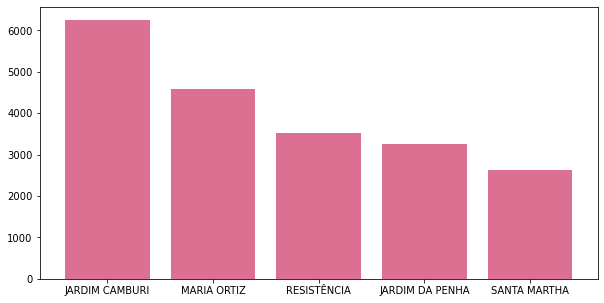

In [564]:
#create a plot to show this
neigh_top = df_1.neighbourhood.value_counts()[0:5]

plt.subplots(figsize = (10, 5));
plt.bar(neigh_top.index, neigh_top, color ='#DB7093');

**The top 5 neighbourhoods hosting the hospitals where the patients showed up for their appointments the most were;**

`JARDIM CAMBURI`     

`MARIA ORTIZ`        

`RESISTÊNCIA`      

`JARDIM DA PENHA`

`SANTA MARTHA `


**If you recell from one of our early explorations, we had identified the top 5 neighbourhood where appointments were made as**

`JARDIM CAMBURI`

`MARIA ORTIZ`

`RESISTÊNCIA`

`JARDIM DA PENHA `

`ITARARÉ `

**We can see that `4` out of these neighbourhood emerged as part of the top 5 nieghbourhoods hosting the hospitals with the most kept appointments.**

Below is a probable reason why the above result is so;

>***We can't reach a firm judgment because this data set doesn't provide us with geographic information about these neighborhoods, but we may presume that these neighbourhoods are residential areas or close to residential areas because they hosted the highest number of appointment show-ups. People, on the whole, prefer to reduce stress and select hospitals that are close to them so that, in the event of an emergency, they won't have to drive for hours before getting aid.***

>***Another explanation for this might be because some of these hospitals have irrefutable reputations for having excellent doctors who have a high proportion of success rates in their treatments, and hence people are more drawn to them.***

**The two assumptions made are not conclusive but tentative, They are only Possible reasons and not definite.**

### Research Question 11: Are the Health scholarship distributed evenly between Males and Females ?

In [534]:
#use pandas groupby to group the scholarship column by gender
schol_gen = df.groupby('scholarship')['gender'].value_counts()
schol_gen

scholarship  gender
0            F         62987
             M         36679
1            F          8853
             M          2008
Name: gender, dtype: int64

**Since the values are not distributed evenly, its best to use proportions instead of counts**

In [535]:
schol_tot = df.groupby('scholarship').age.count()
schol_tot

scholarship
0    99666
1    10861
Name: age, dtype: int64

In [536]:
schol_prop = schol_gen / schol_tot
schol_prop

scholarship  gender
0            F         0.631981
             M         0.368019
1            F         0.815118
             M         0.184882
dtype: float64

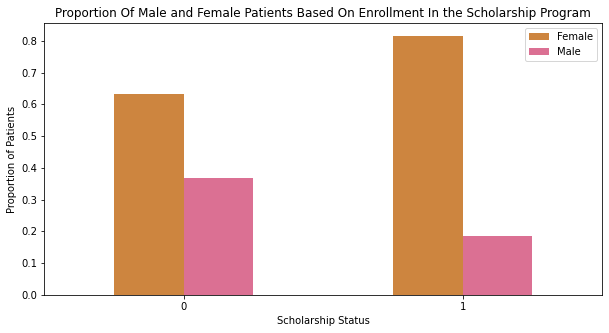

In [566]:
#now, plot a clustered column chart to check the proportion of the male and female  patients that were enrolled in the scholarship program
schol_prop.unstack().plot(kind='bar', figsize =(10, 5), color = ('#CD853F', '#DB7093'))
plt.title("Proportion Of Male and Female Patients Based On Enrollment In the Scholarship Program")
plt.xlabel('Scholarship Status')
plt.ylabel("Proportion of Patients")
plt.legend(labels = ['Female', 'Male']);
plt.xticks(rotation = 0)
plt.show();


`value 0 represent patients who were not enrolled in the scolarship`

`Value 1 represents Patients who were enrolled in the scholarship`

As we can see from the plot above the proportion of female patients who are enrolled in the `Bolsa Familia` scolarship program are much more than the the Male patients who are enrolled in the program

***Hence, to answer our question, NO, the scholarship is not evenly distributed among Male and Females***

<a id='conclusions'></a>
## Conclusions

Having explored this datset, here are the Tentative conclusions made;

**We observed that the average number of days between the day a patient's appointment was booked and the actual day of the appointment was `10 days`, and that these waiting days have an effect on a patient's chance of showing up for his or her visit. We found that the longer a patient has to wait for his or her appointment, the less likely he or she is to show up. Additional Information on why some patients had to wait much longer than the normal wating period of (10-14 days) would have proven useful here.**


**Secondly, we observed that the patients' ages have an impact on their chance of attending their scheduled appointments. We discovered that patients aged `0-17` are less likely than those aged `18 years and above` to show up for their planned appointments.**
   



**Looking further into our data, we discovered that just `10%` of the patients are enlisted in the `Bolsa Familia` scholarship program. While we can't be sure of why this was so, we discovered that the proportion of enlisted females was  much greater than the proportion of enlisted men. We also discovered that patients who were not enlisted in the scholarship program showed up for their appointments more than those who were enlisted. Presumably, we can say that being a scholarship recipient has no impact on patients' chances of making an appearance at their scheduled  appointments. Additional research and information on how the enlistment process takes place would have proven useful at this point.**


**In addition, `12%` of the patient population was disabled, alcoholic, or diabetic, while `20%` were hypertensive, and the remaining `68%` had other health conditions not mentioned above.**
**We observed that, while patients who are diabetic, hypertensive, or handicapped are more likely to show up than those who are not, these medical conditions, including alcoholism, did not necessarily affect the on the likelihood of patients showing up for their appointments.**


**Finally, we observed that while only around `32%` of the patients population got appointment reminder SMS, those who did not get SMS were more likely to show up than those who did.**



#### Limitations discovered in the Dataset includes;

>* Lack of sufficient information on how the Scholarship Enlistment happens
>* Lack of substantial geographical information on the Neighbourhoods covered in this dataset so that we can understand the reason why the neighbourhood with the highest visit had such number of show ups
>* Unequal distribution of values which made us use proportions instead of counts.
>* There was an outlier Age value
>* Cases of appointment days coming before scheduled days